**ELEC5622 Project2**




Any question, please email HangYu (hche4847@uni.sydney.edu.au)

Before we start:

1) You can use the network we trained directly (Part0) to save your time. This nework is based on the AlexNet, but the output feature of the last fully connected layer has been changed to 6.

2) **Two different methods are used for showing the accuracy** (one is the function we defined in Part3, the other is the performance matrix in Part9).
The best accuracy = 88% shown in the performance matrix.

3) We also **visualize** the result in Part8(3)



In [1]:
# import packages
import torch
import torchvision
import torchvision.transforms as transforms
from torch import nn
from torch.utils.data import DataLoader
import torch.nn as nn
from torchvision import models

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Connect with the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Check if GPU is available.

In [3]:
print(torch.cuda.is_available()) # check if cuda is avaliable so that we could use GPU

True


# 0. Load the saved network

Notice that, we have already saved our trained network, you can download and save this network from the following link to your own Google drive and **use (uncomment first) it directly** (especially for part8 and part9) so that you **do not need to train the network again**.

https://drive.google.com/file/d/1gSR2eObMQzX1o-w3sXbL8OnU0di4NtzX/view?usp=sharing



In [43]:
pthfile = '/content/drive/MyDrive/ELEC5622project2net.pth'
net = torch.load(pthfile)
print(net)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 48, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(48, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(192, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(192, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=4608, out_features=2048, bias=True)
    (2): ReLU(inplace=True)
    (3): Dropout(p=0.5, 

# 1. Load the dataset

<Notice> We saved the .zip file in our own Google drive. Please make sure you connect your own Google drive and have the .zip image file first in it.

In [7]:
# load the files from own google drive
!unzip "/content/drive/MyDrive/Three Datasets for Training, Validation and Test.zip" -d our_data


Archive:  /content/drive/MyDrive/Three Datasets for Training, Validation and Test.zip
  inflating: our_data/test.zip       
  inflating: our_data/training.zip   
  inflating: our_data/validation.zip  


In [8]:
!ls

drive  our_data  sample_data


In [9]:
%cd our_data
# !ls
!unzip "test.zip" -d test
!unzip "training.zip" -d training
!unzip "validation.zip" -d validation

流式输出内容被截断，只能显示最后 5000 行内容。
 extracting: training/training/09222.png  
 extracting: training/training/09223.png  
 extracting: training/training/09224.png  
 extracting: training/training/09225.png  
 extracting: training/training/09226.png  
 extracting: training/training/09227.png  
 extracting: training/training/09232.png  
 extracting: training/training/09233.png  
 extracting: training/training/09234.png  
 extracting: training/training/09235.png  
 extracting: training/training/09237.png  
 extracting: training/training/09239.png  
 extracting: training/training/09240.png  
 extracting: training/training/09241.png  
 extracting: training/training/09243.png  
 extracting: training/training/09244.png  
 extracting: training/training/09245.png  
 extracting: training/training/09246.png  
 extracting: training/training/09248.png  
 extracting: training/training/09249.png  
 extracting: training/training/09250.png  
 extracting: training/training/09251.png  
 extracting: training/train

## 1) We firstly load the training, testing and validation set 

In [10]:
import os

# load training file 
dataPath = r'/content/our_data/training/training'
 
print(dataPath)
allName = os.listdir(dataPath)
 
allTrainDataName = []
for filename in os.listdir(dataPath):
    allTrainDataName.append(filename)

# load testing file
dataPath1 = r'/content/our_data/test/test'
print(dataPath1)
allName1 = os.listdir(dataPath1)
 
allTestDataName = []
for filename in os.listdir(dataPath1):
    allTestDataName.append(filename)

# load validation file
dataPath2 = r'/content/our_data/validation/validation'
print(dataPath2)
allName2 = os.listdir(dataPath2)
 
allValDataName = []
for filename in os.listdir(dataPath2):
    allValDataName.append(filename)

/content/our_data/training/training
/content/our_data/test/test
/content/our_data/validation/validation


In [11]:
# print the length and the first image in each dataset

print(len(allTrainDataName))
print(allTrainDataName[0])

print(len(allTestDataName))
print(allTestDataName[0])

print(len(allValDataName))
print(allValDataName[0])

8701
03635.png
2720
02839.png
2175
10428.png


In [12]:
# sort the images in each data set
allTrainDataName.sort()
print(allTrainDataName[0])

allTestDataName.sort()
print(allTestDataName[0])

allValDataName.sort()
print(allValDataName[0])

00001.png
00003.png
00006.png


In [13]:
print(type(allTrainDataName[0]))

<class 'str'>


Find the index of the last image for each dataset

In [14]:
print(allTrainDataName[1500]) # this will print the name of the 1500th image

# seperate the images in each file into 6 classes
# class 1: 1-2494
# class 2: 2495-5325
# class 3: 5326-7923
# class 4: 7924-10664
# class 5: 10665-12872
# class 6: 12873-13596

for i in range (len(allTrainDataName)):
  if allTrainDataName[i] == '02494.png':
    training_first_index = i
  if allTrainDataName[i] == '05325.png':
    training_second_index = i
  if allTrainDataName[i] == '07923.png':
    training_third_index = i
  if allTrainDataName[i] == '10664.png': # The last image in 
    training_fourth_index = i
  if allTrainDataName[i] == '12871.png': # The last image in NuMem
    training_fifth_index = i
  if allTrainDataName[i] == '13596.png': 
    training_sixth_index = i
print(training_first_index)
print(training_second_index)
print(training_third_index)
print(training_fourth_index)
print(training_fifth_index)
print(training_sixth_index)
print('---------')

for i in range (len(allTestDataName)):
  if allTestDataName[i] == '02490.png':
    test_first_index = i
  if allTestDataName[i] == '05315.png':
    test_second_index = i
  if allTestDataName[i] == '07922.png':
    test_third_index = i
  if allTestDataName[i] == '10657.png': # The last image in 
    test_fourth_index = i
  if allTestDataName[i] == '12866.png': # The last image in NuMem
    test_fifth_index = i
  if allTestDataName[i] == '13595.png': 
    test_sixth_index = i
print(test_first_index)
print(test_second_index)
print(test_third_index)
print(test_fourth_index)
print(test_fifth_index)
print(test_sixth_index)
print('---------')


for i in range (len(allValDataName)):
  if allValDataName[i] == '02487.png':
    val_first_index = i
  if allValDataName[i] == '05323.png':
    val_second_index = i
  if allValDataName[i] == '07918.png':
    val_third_index = i
  if allValDataName[i] == '10658.png': # The last image in 
    val_fourth_index = i
  if allValDataName[i] == '12872.png': # The last image in NuMem
    val_fifth_index = i
  if allValDataName[i] == '13594.png': 
    val_sixth_index = i
print(val_first_index)
print(val_second_index)
print(val_third_index)
print(val_fourth_index)
print(val_fifth_index)
print(val_sixth_index)

02400.png
1555
3355
5030
6821
8251
8700
---------
522
1097
1626
2113
2554
2719
---------
414
870
1264
1727
2064
2174


In [15]:
# We currently upload the images in training set into a multiple dimension list

mylib1 = [] # store the images in the first case: Homogeneous
mylib2 = []
mylib3 = []
mylib4 = []
mylib5 = []
mylib6 = []

for i in range (1556):
  mylib1.append(['/content/our_data/training/training/'+allTrainDataName[i],0])

print(len(mylib1))
print(mylib1[0])
print(mylib1[-1])

for i in range (1556,3356):
  mylib2.append(['/content/our_data/training/training/'+allTrainDataName[i],1])

print(len(mylib2))
print(mylib2[0])
print(mylib2[-1])

for i in range (3356,5031):
  mylib3.append(['/content/our_data/training/training/'+allTrainDataName[i],2])
print(len(mylib3))
print(mylib3[0])
print(mylib3[-1])

for i in range (5031,6822):
  mylib4.append(['/content/our_data/training/training/'+allTrainDataName[i],3])
print(len(mylib4))
print(mylib4[0])
print(mylib4[-1])

for i in range (6822,8252):
  mylib5.append(['/content/our_data/training/training/'+allTrainDataName[i],4])
print(len(mylib5))
print(mylib5[0])
print(mylib5[-1])

for i in range (8252,8701):
  mylib6.append(['/content/our_data/training/training/'+allTrainDataName[i],5])
print(len(mylib6))
print(mylib6[0])
print(mylib6[-1])

# The output will be: [[imageName1, class_name], [imageName2, class_name], ...]

# class_num = 0 means: Homogeneous
# class_num = 1 means: Speckled
# etc.

1556
['/content/our_data/training/training/00001.png', 0]
['/content/our_data/training/training/02494.png', 0]
1800
['/content/our_data/training/training/02495.png', 1]
['/content/our_data/training/training/05325.png', 1]
1675
['/content/our_data/training/training/05330.png', 2]
['/content/our_data/training/training/07923.png', 2]
1791
['/content/our_data/training/training/07924.png', 3]
['/content/our_data/training/training/10664.png', 3]
1430
['/content/our_data/training/training/10665.png', 4]
['/content/our_data/training/training/12871.png', 4]
449
['/content/our_data/training/training/12873.png', 5]
['/content/our_data/training/training/13596.png', 5]


In [16]:
# We currently upload the images in testing set into a multiple dimension list

testlib1 = [] # store the images in the first case: Homogeneous
testlib2 = []
testlib3 = []
testlib4 = []
testlib5 = []
testlib6 = []

for i in range (523):
  testlib1.append(['/content/our_data/test/test/'+allTestDataName[i],0])

print(len(testlib1))
print(testlib1[0])
print(testlib1[-1])

for i in range (523,1098):
  testlib2.append(['/content/our_data/test/test/'+allTestDataName[i],1])

print(len(mylib2))
print(testlib2[0])
print(testlib2[-1])

for i in range (1098,1627):
  testlib3.append(['/content/our_data/test/test/'+allTestDataName[i],2])
print(len(mylib3))
print(testlib3[0])
print(testlib3[-1])

for i in range (1627,2114):
  testlib4.append(['/content/our_data/test/test/'+allTestDataName[i],3])
print(len(testlib4))
print(testlib4[0])
print(testlib4[-1])

for i in range (2114,2555):
  testlib5.append(['/content/our_data/test/test/'+allTestDataName[i],4])
print(len(testlib5))
print(testlib5[0])
print(testlib5[-1])

for i in range (2555,2720):
  testlib6.append(['/content/our_data/test/test/'+allTestDataName[i],5])
print(len(testlib6))
print(testlib6[0])
print(testlib6[-1])

# The output will be: [[imageName1, class_name], [imageName2, class_name], ...]

# class 1 means: Homogeneous
# class 2 means: Speckled
# etc.

523
['/content/our_data/test/test/00003.png', 0]
['/content/our_data/test/test/02490.png', 0]
1800
['/content/our_data/test/test/02500.png', 1]
['/content/our_data/test/test/05315.png', 1]
1675
['/content/our_data/test/test/05326.png', 2]
['/content/our_data/test/test/07922.png', 2]
487
['/content/our_data/test/test/07931.png', 3]
['/content/our_data/test/test/10657.png', 3]
441
['/content/our_data/test/test/10677.png', 4]
['/content/our_data/test/test/12866.png', 4]
165
['/content/our_data/test/test/12877.png', 5]
['/content/our_data/test/test/13595.png', 5]


In [17]:
# We currently upload the images in validation set into a multiple dimension list

vallib1 = [] # store the images in the first case: Homogeneous
vallib2 = []
vallib3 = []
vallib4 = []
vallib5 = []
vallib6 = []

for i in range (415):
  vallib1.append(['/content/our_data/validation/validation/'+allValDataName[i],0])

print(len(vallib1))
print(vallib1[0])
print(vallib1[-1])

for i in range (415,871):
  vallib2.append(['/content/our_data/validation/validation/'+allValDataName[i],1])

print(len(vallib2))
print(vallib2[0])
print(vallib2[-1])

for i in range (871,1265):
  vallib3.append(['/content/our_data/validation/validation/'+allValDataName[i],2])
print(len(vallib3))
print(vallib3[0])
print(vallib3[-1])

for i in range (1265,1728):
  vallib4.append(['/content/our_data/validation/validation/'+allValDataName[i],3])
print(len(vallib4))
print(vallib4[0])
print(vallib4[-1])

for i in range (1728,2065):
  vallib5.append(['/content/our_data/validation/validation/'+allValDataName[i],4])
print(len(vallib5))
print(vallib5[0])
print(vallib5[-1])

for i in range (2065,2175):
  vallib6.append(['/content/our_data/validation/validation/'+allValDataName[i],5])
print(len(vallib6))
print(vallib6[0])
print(vallib6[-1])

# The output will be: [[imageName1, class_name], [imageName2, class_name], ...]

# class 1 means: Homogeneous
# class 2 means: Speckled
# etc.

415
['/content/our_data/validation/validation/00006.png', 0]
['/content/our_data/validation/validation/02487.png', 0]
456
['/content/our_data/validation/validation/02504.png', 1]
['/content/our_data/validation/validation/05323.png', 1]
394
['/content/our_data/validation/validation/05327.png', 2]
['/content/our_data/validation/validation/07918.png', 2]
463
['/content/our_data/validation/validation/07928.png', 3]
['/content/our_data/validation/validation/10658.png', 3]
337
['/content/our_data/validation/validation/10666.png', 4]
['/content/our_data/validation/validation/12872.png', 4]
110
['/content/our_data/validation/validation/12882.png', 5]
['/content/our_data/validation/validation/13594.png', 5]


## 2) We Save the dataset lists as dictionary

In [18]:
# Using a dictionary to save all the images with their own class number

mylib = mylib1+mylib2+mylib3+mylib4+mylib5+mylib6

testlib = testlib1+testlib2+testlib3+testlib4+testlib5+testlib6

vallib = vallib1+vallib2+vallib3+vallib4+vallib5+vallib6

mylib = dict(mylib)
testlib = dict(testlib)
vallib = dict(vallib)

In [19]:
# print the keys of the library 
# print(mylib.keys())

## 3) Set up our own datasets and dataloaders

Also apply data argumentation for the images
1) Normalization
2) Horizontal Flip

In [20]:
from torch.utils.data import Dataset
import PIL

transform1 = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean = (0.5, 0.5, 0.5), std = (0.5, 0.5, 0.5)),
    transforms.RandomHorizontalFlip(p=0.5)
    ]
)

class OurDataset(Dataset):
  def __init__(self, image_path_to_class_dict, apply_resize= True):
    super().__init__()
    self.image_path_to_class_dict = image_path_to_class_dict
    
    self.image_paths = list(self.image_path_to_class_dict.keys())
    self.resize = torchvision.transforms.Resize((224, 224))
    #self.normalize = torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    self.apply_resize = apply_resize

  def __len__(self):   # we can get the size of this dataset by using len()
    return len(self.image_paths)

  def __getitem__(self, index):  # we can access those data with indexes
    #image = PIL.Image.open(self.image_paths[index]).convert('RGB')

    image = PIL.Image.open(self.image_paths[index]).convert('RGB') # read the image
    image = transform1(image)
    image = transforms.ToPILImage()(image).convert('RGB')

    image = torchvision.transforms.ToTensor()(image)
    if self.apply_resize:
      image = np.array(self.resize(image))
    else:
      image = np.array(image)
    class_name = self.image_path_to_class_dict[self.image_paths[index]]
    
    return (image, class_name)

train_dataset = OurDataset(mylib)
test_dataset = OurDataset(testlib)
val_dataset = OurDataset(vallib)

In [21]:
# print the lenth of each data set
print(len(train_dataset))
print(len(test_dataset))
print(len(val_dataset))

8701
2720
2175


In [22]:
# print the first itm in training dataset
print(train_dataset[0]) 

# the result should be [[image], class_num]

(array([[[2.54901975e-01, 2.54901975e-01, 2.54901975e-01, ...,
         1.27380863e-01, 1.21918686e-01, 1.21568628e-01],
        [2.54901975e-01, 2.54901975e-01, 2.54901975e-01, ...,
         1.28015518e-01, 1.24260277e-01, 1.24019608e-01],
        [2.54901975e-01, 2.54901975e-01, 2.54901975e-01, ...,
         1.37916222e-01, 1.60789058e-01, 1.62254900e-01],
        ...,
        [2.54901975e-01, 2.54901975e-01, 2.54901975e-01, ...,
         2.64730584e-02, 3.57329510e-02, 3.63263898e-02],
        [2.54901975e-01, 2.54901975e-01, 2.54901975e-01, ...,
         2.95994338e-03, 2.23434274e-03, 2.18784111e-03],
        [2.54901975e-01, 2.54901975e-01, 2.54901975e-01, ...,
         1.45305565e-03, 8.75136466e-05, 0.00000000e+00]],

       [[2.54901975e-01, 2.54901975e-01, 2.54901975e-01, ...,
         1.27380863e-01, 1.21918686e-01, 1.21568628e-01],
        [2.54901975e-01, 2.54901975e-01, 2.54901975e-01, ...,
         1.28015518e-01, 1.24260277e-01, 1.24019608e-01],
        [2.54901975e-01,

In [23]:
print(train_dataset[0][0].shape) # the shape of the image will be [3,224,224] = [Channel, Height, Weight]

(3, 224, 224)


In [24]:
train_dataloader = DataLoader(train_dataset, batch_size=6, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=6, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=6, shuffle=True)


# check some properties in the first batch
first_batch = next(iter(train_dataloader))

print(f'the type of this object is {type(first_batch)}') 
print(f'the length of this tuple is {len(first_batch)}')  
print(f'the type of the first item in the tuple is {type(first_batch[0])}')  # Tensor!
print(f'the shape of the first item (image tensors) is {first_batch[0].shape}')  # The size of image tensors in this batch!
print(f'the shape of the first item (image tensors) is {first_batch[0][0].shape}')

print(f'the shape of the second item is {first_batch[1].shape}')
print(f'the second item in the tuple is {first_batch[1]}')  # The labels (batch size=6 means there are 6 labels)

the type of this object is <class 'list'>
the length of this tuple is 2
the type of the first item in the tuple is <class 'torch.Tensor'>
the shape of the first item (image tensors) is torch.Size([6, 3, 224, 224])
the shape of the first item (image tensors) is torch.Size([3, 224, 224])
the shape of the second item is torch.Size([6])
the second item in the tuple is tensor([4, 0, 2, 1, 1, 2])


# 2. Set up the network

Notice in this part, we change the last fully connected layer with output features = 6 because we have 6 classes.

In [ ]:

# The code below using the pre-trained AlexNet network
# net = models.alexnet(pretrained=True).cuda()
# print(net)


class AlexNet(nn.Module):
    def __init__(self, num_classes=6, init_weights=False):   
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(  # pack up all the layers
            nn.Conv2d(3, 48, kernel_size=11, stride=4, padding=2),  # input[3, 224, 224]  output[48, 55, 55] (remove the value after decimal point auto)
            nn.ReLU(inplace=True), #inplace could load larger model
            nn.MaxPool2d(kernel_size=3, stride=2),                  # output[48, 27, 27] 
            nn.Conv2d(48, 128, kernel_size=5, padding=2),           # output[128, 27, 27]
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),                  # output[128, 13, 13]
            nn.Conv2d(128, 192, kernel_size=3, padding=1),          # output[192, 13, 13]
            nn.ReLU(inplace=True),
            nn.Conv2d(192, 192, kernel_size=3, padding=1),          # output[192, 13, 13]
            nn.ReLU(inplace=True),
            nn.Conv2d(192, 128, kernel_size=3, padding=1),          # output[128, 13, 13]
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),                  # output[128, 6, 6]
        )
        self.classifier = nn.Sequential(
            nn.Dropout(p=0.5),
            #fully connected layer
            nn.Linear(128 * 6 * 6, 2048),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5),
            nn.Linear(2048, 2048),
            nn.ReLU(inplace=True),
            nn.Linear(2048, num_classes),
        )
        if init_weights:
            self._initialize_weights()

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, start_dim=1) #flatten  or using view()
        x = self.classifier(x)
        return x

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)  #normalization 
                nn.init.constant_(m.bias, 0)

net = AlexNet(num_classes=6, init_weights=True).cuda()


# 3. Define loss function and the optimizer

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# 4. A accuracy prediction function

In [ ]:
def testset_precision(net, testset): # This function is used for calculate the accuracy for the testset
    dl = DataLoader(testset, batch_size = 128) # load test set
    total_count = 0  # total numbers of test set
    total_correct = 0 # total correct predictions of test set
    for data in dl:  # iterate test set
        inputs = data[0].cuda()  # input data, such as images, etc
        targets = data[1].cuda()   # ground truth labels
        outputs = net(inputs)    # get the outputs from network
        predicted_labels = outputs.argmax(dim=1)  # obtain the class with highest score as prediction
        comparison = predicted_labels == targets  # get a [True, False,...] matrix. True means correct prediction
        total_count += predicted_labels.size(0)   # accumulate the test number
        total_correct += comparison.sum()      # accumulate the number of correct predictions
        
    return int(total_correct) / int(total_count)

# 5. Train the baseline network

In [ ]:
# In this part, we train the network using batch size = 4
my_train_loss = []
my_test_acc = []
my_val_loss = []
my_val_acc = []
for epoch in range(4):  # loop over the dataset multiple times
    val_running_loss = 0.0
    for i, data in enumerate(val_dataloader, 0):
        # get the inputs
        inputs, labels = data
        
        if torch.cuda.is_available(): # load into GPU
          inputs,labels = inputs.cuda(), labels.cuda()
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        if torch.cuda.is_available():
          loss = loss.cpu()

        # print statistics
        val_running_loss += loss.item()
        
    print('The val_loss of the %d epoch is: %.3f' %
                      (epoch + 1, val_running_loss / len(val_dataloader)))
    a = testset_precision(net, val_dataset)
    print(f'validation set accuracy is: {a}')
    my_val_loss.append(val_running_loss / len(val_dataloader))
    my_val_acc.append(a)
            
    train_running_loss = 0.0
    for i, data in enumerate(train_dataloader, 0):
        # get the inputs
        inputs, labels = data
        if torch.cuda.is_available():
          inputs,labels = inputs.cuda(), labels.cuda()
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        if torch.cuda.is_available():
          loss = loss.cpu()

        # print statistics
        train_running_loss += loss.item()
    print('The train_loss of the %d epoch is: %.3f' %
                    (epoch + 1, train_running_loss / len(train_dataloader)))
    b = testset_precision(net, test_dataset)
    print(f'test set accuracy is: {b}')
    my_train_loss.append(train_running_loss / len(train_dataloader))
    my_test_acc.append(b)
print('Finished Training')

The val_loss of the 1 epoch is: 1.707
validation set accuracy is: 0.3503448275862069
The train_loss of the 1 epoch is: 1.167
test set accuracy is: 0.6797794117647059
The val_loss of the 2 epoch is: 0.832
validation set accuracy is: 0.7383908045977011
The train_loss of the 2 epoch is: 0.727
test set accuracy is: 0.7558823529411764
The val_loss of the 3 epoch is: 0.632
validation set accuracy is: 0.7554022988505747
The train_loss of the 3 epoch is: 0.599
test set accuracy is: 0.7849264705882353
The val_loss of the 4 epoch is: 0.569
validation set accuracy is: 0.7783908045977012
The train_loss of the 4 epoch is: 0.555
test set accuracy is: 0.80625
Finished Training


# 6. Visualize the accuracy and loss

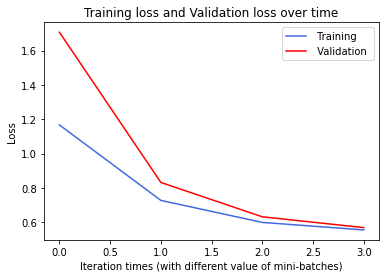

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show the loss
plt.figure()
plt.title('Training loss and Validation loss over time')
plt.plot(my_train_loss,'-',color = 'blue')
plt.plot(my_val_loss,'-',color = 'red')
plt.legend([' Training ',' Validation '])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

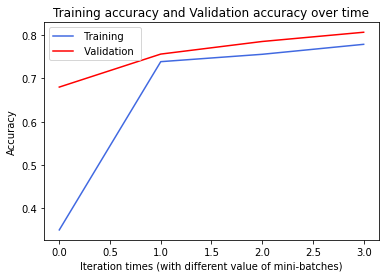

In [ ]:
# functions to show the accuracy
plt.figure()
plt.title('Training accuracy and Validation accuracy over time')
plt.plot(my_val_acc,'-',color = 'blue')
plt.plot(my_test_acc,'-',color = 'red')
plt.legend([' Training ',' Validation '])
plt.xlabel('Epoch)')
plt.ylabel('Accuracy')
plt.show()



# 7. Hyperparameters Selection

As we have already got a baseline network, in this section, we will choose different hyperparameters to get the best results.

We mainly focus on the Batch size, epoch and learning rate

And we made several diagrams to show the loss and accuracy.

### a) When batch size = 4

In [ ]:
train_dataloader4 = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_dataloader4 = DataLoader(test_dataset, batch_size=4, shuffle=True)
val_dataloader4 = DataLoader(val_dataset, batch_size=4, shuffle=True)

In [ ]:
# Your codes here. 
# Please do not define the networks again, just make changes to the training procedure, i.e. in the loop, please go through all the potential choices.


def mytrain(train_loss, test_acc, val_loss, val_acc, learning_rate): # This function is used to train the model with batch size = 4 only
  for n in range (len(learning_rate)):
    net = AlexNet(num_classes=6, init_weights=True).cuda()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=learning_rate[n], momentum=0.9)
    my_train_loss = []
    my_test_acc = []
    my_val_loss = []
    my_val_acc = []
    for epoch in range(15):  # loop over the dataset multiple times
      val_running_loss = 0.0
      for i, data in enumerate(val_dataloader4, 0):
          # get the inputs
          inputs, labels = data
          if torch.cuda.is_available():
            inputs,labels = inputs.cuda(), labels.cuda()
          # zero the parameter gradients
          optimizer.zero_grad()

          # forward + backward + optimize
          outputs = net(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()
          if torch.cuda.is_available():
            loss = loss.cpu()

          # print statistics
          val_running_loss += loss.item()
      print('The val_loss of the %d epoch is: %.3f' % (epoch + 1, val_running_loss / len(val_dataloader4)))
      a = testset_precision(net, val_dataset)
      print(f'validation set accuracy is: {a}')
      my_val_loss.append(val_running_loss / len(val_dataloader4))
      my_val_acc.append(a)
          

      train_running_loss = 0.0
      for i, data in enumerate(train_dataloader4, 0):
          # get the inputs
          inputs, labels = data
          if torch.cuda.is_available():
            inputs,labels = inputs.cuda(), labels.cuda()
          # zero the parameter gradients
          optimizer.zero_grad()

          # forward + backward + optimize
          outputs = net(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()
          if torch.cuda.is_available():
            loss = loss.cpu()

          # print statistics
          train_running_loss += loss.item()
      print('The train_loss of the %d epoch is: %.3f' %
                    (epoch + 1, train_running_loss / len(train_dataloader4)))
      b = testset_precision(net, test_dataset)
      print(f'test set accuracy is: {b}')
      my_train_loss.append(train_running_loss / len(train_dataloader4))
      my_test_acc.append(b)
      train_running_loss = 0.0

    # add the value into lists after one epoch
    test_acc.append(my_test_acc)
    val_acc.append(my_val_acc)
    val_loss.append(my_val_loss)
    train_loss.append(my_train_loss)
    print('Finished Training for learning rate = %0.5f \n' %(learning_rate[n]))

In [ ]:
learning_rate = [0.05, 0.01, 0.005, 0.001, 0.0005] # we have 5 options for learning rate
train_loss = []
test_acc = []
val_loss = []
val_acc = []
mytrain(train_loss, test_acc, val_loss, val_acc, learning_rate)

The val_loss of the 1 epoch is: 1.774
validation set accuracy is: 0.2096551724137931
The train_loss of the 1 epoch is: 1.754
test set accuracy is: 0.2113970588235294
The val_loss of the 2 epoch is: 1.752
validation set accuracy is: 0.2128735632183908
The train_loss of the 2 epoch is: 1.752
test set accuracy is: 0.17904411764705883
The val_loss of the 3 epoch is: 1.758
validation set accuracy is: 0.2128735632183908
The train_loss of the 3 epoch is: 1.754
test set accuracy is: 0.2113970588235294
The val_loss of the 4 epoch is: 1.746
validation set accuracy is: 0.2096551724137931
The train_loss of the 4 epoch is: 1.750
test set accuracy is: 0.17904411764705883
The val_loss of the 5 epoch is: 1.746
validation set accuracy is: 0.19080459770114944
The train_loss of the 5 epoch is: 1.750
test set accuracy is: 0.16213235294117648
The val_loss of the 6 epoch is: 1.748
validation set accuracy is: 0.2128735632183908
The train_loss of the 6 epoch is: 1.751
test set accuracy is: 0.17904411764705883

The length of the train_loss is 5
The length of the first item in train_loss is 15


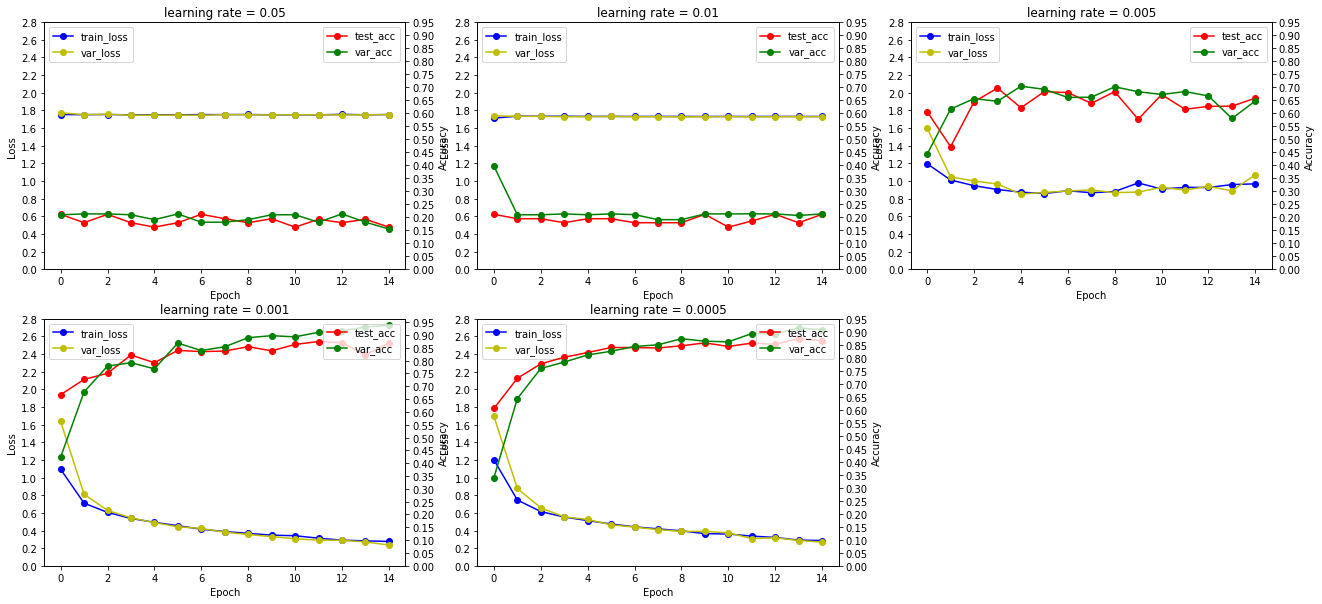

In [ ]:
print('The length of the train_loss is %d' %len(train_loss))
print('The length of the first item in train_loss is %d' %len(train_loss[0]))
plt.figure
plt.figure(figsize=(22,10))

plt.subplot(2,3,1)
plt.title('learning rate = 0.05')
plt.plot(np.arange(15),train_loss[0][0:15],color = 'b',marker = 'o')
plt.plot(np.arange(15),val_loss[0][0:15],color = 'y',marker = 'o')
plt.yticks(np.arange(0,3,0.2))
plt.legend(['train_loss','var_loss'],loc = 'upper left')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.twinx()
plt.plot(np.arange(15),test_acc[0][0:15],color = 'r',marker = 'o')
plt.plot(np.arange(15),val_acc[0][0:15],color = 'g',marker = 'o')
plt.yticks(np.arange(0,1,0.05))
plt.ylabel('Accuracy')
plt.legend(['test_acc','var_acc'],loc = 'upper right')

plt.subplot(2,3,2)
plt.title('learning rate = 0.01')
plt.plot(np.arange(15),train_loss[1][0:15],color = 'b',marker = 'o')
plt.plot(np.arange(15),val_loss[1][0:15],color = 'y',marker = 'o')
plt.yticks(np.arange(0,3,0.2))
plt.legend(['train_loss','var_loss'],loc = 'upper left')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.twinx()
plt.plot(np.arange(15),test_acc[1][0:15],color = 'r',marker = 'o')
plt.plot(np.arange(15),val_acc[1][0:15],color = 'g',marker = 'o')
plt.yticks(np.arange(0,1,0.05))
plt.ylabel('Accuracy')
plt.legend(['test_acc','var_acc'],loc = 'upper right')

plt.subplot(2,3,3)
plt.title('learning rate = 0.005')
plt.plot(np.arange(15),train_loss[2][0:15],color = 'b',marker = 'o')
plt.plot(np.arange(15),val_loss[2][0:15],color = 'y',marker = 'o')
plt.yticks(np.arange(0,3,0.2))
plt.legend(['train_loss','var_loss'],loc = 'upper left')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.twinx()
plt.plot(np.arange(15),test_acc[2][0:15],color = 'r',marker = 'o')
plt.plot(np.arange(15),val_acc[2][0:15],color = 'g',marker = 'o')
plt.yticks(np.arange(0,1,0.05))
plt.ylabel('Accuracy')
plt.legend(['test_acc','var_acc'],loc = 'upper right')

plt.subplot(2,3,4)
plt.title('learning rate = 0.001')
plt.plot(np.arange(15),train_loss[3][0:15],color = 'b',marker = 'o')
plt.plot(np.arange(15),val_loss[3][0:15],color = 'y',marker = 'o')
plt.yticks(np.arange(0,3,0.2))
plt.legend(['train_loss','var_loss'],loc = 'upper left')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.twinx()
plt.plot(np.arange(15),test_acc[3][0:15],color = 'r',marker = 'o')
plt.plot(np.arange(15),val_acc[3][0:15],color = 'g',marker = 'o')
plt.yticks(np.arange(0,1,0.05))
plt.ylabel('Accuracy')
plt.legend(['test_acc','var_acc'],loc = 'upper right')

plt.subplot(2,3,5)
plt.title('learning rate = 0.0005')
plt.plot(np.arange(15),train_loss[4][0:15],color = 'b',marker = 'o')
plt.plot(np.arange(15),val_loss[4][0:15],color = 'y',marker = 'o')
plt.yticks(np.arange(0,3,0.2))
plt.legend(['train_loss','var_loss'],loc = 'upper left')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.twinx()
plt.plot(np.arange(15),test_acc[4][0:15],color = 'r',marker = 'o')
plt.plot(np.arange(15),val_acc[4][0:15],color = 'g',marker = 'o')
plt.yticks(np.arange(0,1,0.05))
plt.ylabel('Accuracy')
plt.legend(['test_acc','var_acc'],loc = 'upper right')



### b) When the batch size = 6

In [ ]:
train_dataloader6 = DataLoader(train_dataset, batch_size=6, shuffle=True)
test_dataloader6 = DataLoader(test_dataset, batch_size=6, shuffle=True)
val_dataloader6 = DataLoader(val_dataset, batch_size=6, shuffle=True)

In [ ]:
# Your codes here. 
# Please do not define the networks again, just make changes to the training procedure, i.e. in the loop, please go through all the potential choices.


def mytrain(train_loss, test_acc, val_loss, val_acc, learning_rate): # This function is used to train the model with batch size = 6 only
  for n in range (len(learning_rate)):
    net = AlexNet(num_classes=6, init_weights=True).cuda()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=learning_rate[n], momentum=0.9)
    my_train_loss = []
    my_test_acc = []
    my_val_loss = []
    my_val_acc = []
    for epoch in range(15):  # loop over the dataset multiple times
      val_running_loss = 0.0
      for i, data in enumerate(val_dataloader6, 0):
          # get the inputs
          inputs, labels = data
          if torch.cuda.is_available():
            inputs,labels = inputs.cuda(), labels.cuda()
          # zero the parameter gradients
          optimizer.zero_grad()

          # forward + backward + optimize
          outputs = net(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()
          if torch.cuda.is_available():
            loss = loss.cpu()

          # print statistics
          val_running_loss += loss.item()
      print('The val_loss of the %d epoch is: %.3f' % (epoch + 1, val_running_loss / len(val_dataloader6)))
      a = testset_precision(net, val_dataset)
      print(f'validation set accuracy is: {a}')
      my_val_loss.append(val_running_loss / len(val_dataloader6))
      my_val_acc.append(a)
          

      train_running_loss = 0.0
      for i, data in enumerate(train_dataloader6, 0):
          # get the inputs
          inputs, labels = data
          if torch.cuda.is_available():
            inputs,labels = inputs.cuda(), labels.cuda()
          # zero the parameter gradients
          optimizer.zero_grad()

          # forward + backward + optimize
          outputs = net(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()
          if torch.cuda.is_available():
            loss = loss.cpu()

          # print statistics
          train_running_loss += loss.item()
      print('The train_loss of the %d epoch is: %.3f' %
                    (epoch + 1, train_running_loss / len(train_dataloader6)))
      b = testset_precision(net, test_dataset)
      print(f'test set accuracy is: {b}')
      my_train_loss.append(train_running_loss / len(train_dataloader6))
      my_test_acc.append(b)
      train_running_loss = 0.0

    # add the value into lists after one epoch
    test_acc.append(my_test_acc)
    val_acc.append(my_val_acc)
    val_loss.append(my_val_loss)
    train_loss.append(my_train_loss)
    print('Finished Training for learning rate = %0.5f \n' %(learning_rate[n]))

In [ ]:
learning_rate = [0.05, 0.01, 0.005, 0.001, 0.0005] # we have 5 options for learning rate
train_loss = []
test_acc = []
val_loss = []
val_acc = []
mytrain(train_loss, test_acc, val_loss, val_acc, learning_rate)

The val_loss of the 1 epoch is: 1.769
validation set accuracy is: 0.2096551724137931
The train_loss of the 1 epoch is: 1.745
test set accuracy is: 0.1922794117647059
The val_loss of the 2 epoch is: 1.738
validation set accuracy is: 0.1811494252873563
The train_loss of the 2 epoch is: 1.743
test set accuracy is: 0.17904411764705883
The val_loss of the 3 epoch is: 1.739
validation set accuracy is: 0.2096551724137931
The train_loss of the 3 epoch is: 1.741
test set accuracy is: 0.17904411764705883
The val_loss of the 4 epoch is: 1.739
validation set accuracy is: 0.2096551724137931
The train_loss of the 4 epoch is: 1.744
test set accuracy is: 0.16213235294117648
The val_loss of the 5 epoch is: 1.742
validation set accuracy is: 0.2128735632183908
The train_loss of the 5 epoch is: 1.746
test set accuracy is: 0.17904411764705883
The val_loss of the 6 epoch is: 1.737
validation set accuracy is: 0.2128735632183908
The train_loss of the 6 epoch is: 1.744
test set accuracy is: 0.17904411764705883

The length of the train_loss is 5
The length of the first item in train_loss is 15


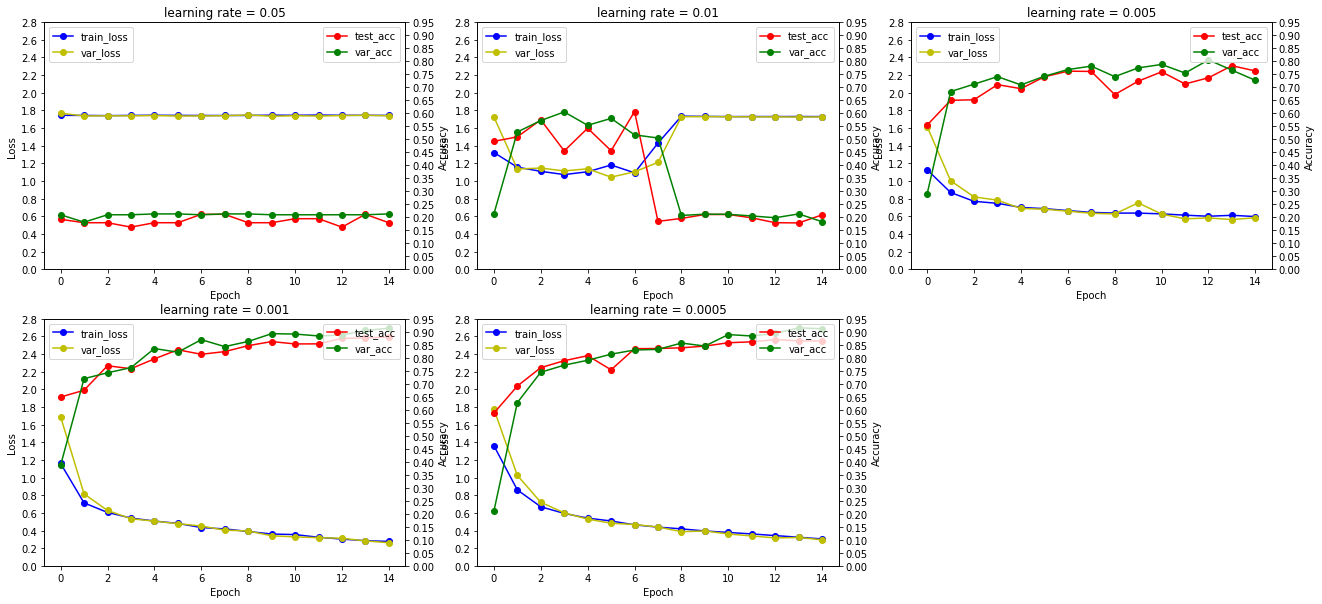

In [ ]:
print('The length of the train_loss is %d' %len(train_loss))
print('The length of the first item in train_loss is %d' %len(train_loss[0]))
plt.figure
plt.figure(figsize=(22,10))

plt.subplot(2,3,1)
plt.title('learning rate = 0.05')
plt.plot(np.arange(15),train_loss[0][0:15],color = 'b',marker = 'o')
plt.plot(np.arange(15),val_loss[0][0:15],color = 'y',marker = 'o')
plt.yticks(np.arange(0,3,0.2))
plt.legend(['train_loss','var_loss'],loc = 'upper left')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.twinx()
plt.plot(np.arange(15),test_acc[0][0:15],color = 'r',marker = 'o')
plt.plot(np.arange(15),val_acc[0][0:15],color = 'g',marker = 'o')
plt.yticks(np.arange(0,1,0.05))
plt.ylabel('Accuracy')
plt.legend(['test_acc','var_acc'],loc = 'upper right')

plt.subplot(2,3,2)
plt.title('learning rate = 0.01')
plt.plot(np.arange(15),train_loss[1][0:15],color = 'b',marker = 'o')
plt.plot(np.arange(15),val_loss[1][0:15],color = 'y',marker = 'o')
plt.yticks(np.arange(0,3,0.2))
plt.legend(['train_loss','var_loss'],loc = 'upper left')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.twinx()
plt.plot(np.arange(15),test_acc[1][0:15],color = 'r',marker = 'o')
plt.plot(np.arange(15),val_acc[1][0:15],color = 'g',marker = 'o')
plt.yticks(np.arange(0,1,0.05))
plt.ylabel('Accuracy')
plt.legend(['test_acc','var_acc'],loc = 'upper right')

plt.subplot(2,3,3)
plt.title('learning rate = 0.005')
plt.plot(np.arange(15),train_loss[2][0:15],color = 'b',marker = 'o')
plt.plot(np.arange(15),val_loss[2][0:15],color = 'y',marker = 'o')
plt.yticks(np.arange(0,3,0.2))
plt.legend(['train_loss','var_loss'],loc = 'upper left')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.twinx()
plt.plot(np.arange(15),test_acc[2][0:15],color = 'r',marker = 'o')
plt.plot(np.arange(15),val_acc[2][0:15],color = 'g',marker = 'o')
plt.yticks(np.arange(0,1,0.05))
plt.ylabel('Accuracy')
plt.legend(['test_acc','var_acc'],loc = 'upper right')

plt.subplot(2,3,4)
plt.title('learning rate = 0.001')
plt.plot(np.arange(15),train_loss[3][0:15],color = 'b',marker = 'o')
plt.plot(np.arange(15),val_loss[3][0:15],color = 'y',marker = 'o')
plt.yticks(np.arange(0,3,0.2))
plt.legend(['train_loss','var_loss'],loc = 'upper left')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.twinx()
plt.plot(np.arange(15),test_acc[3][0:15],color = 'r',marker = 'o')
plt.plot(np.arange(15),val_acc[3][0:15],color = 'g',marker = 'o')
plt.yticks(np.arange(0,1,0.05))
plt.ylabel('Accuracy')
plt.legend(['test_acc','var_acc'],loc = 'upper right')

plt.subplot(2,3,5)
plt.title('learning rate = 0.0005')
plt.plot(np.arange(15),train_loss[4][0:15],color = 'b',marker = 'o')
plt.plot(np.arange(15),val_loss[4][0:15],color = 'y',marker = 'o')
plt.yticks(np.arange(0,3,0.2))
plt.legend(['train_loss','var_loss'],loc = 'upper left')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.twinx()
plt.plot(np.arange(15),test_acc[4][0:15],color = 'r',marker = 'o')
plt.plot(np.arange(15),val_acc[4][0:15],color = 'g',marker = 'o')
plt.yticks(np.arange(0,1,0.05))
plt.ylabel('Accuracy')
plt.legend(['test_acc','var_acc'],loc = 'upper right')



### c) When the batch size = 8

In [ ]:
train_dataloader8 = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_dataloader8 = DataLoader(test_dataset, batch_size=8, shuffle=True)
val_dataloader8 = DataLoader(val_dataset, batch_size=8, shuffle=True)

In [ ]:
# Your codes here. 
# Please do not define the networks again, just make changes to the training procedure, i.e. in the loop, please go through all the potential choices.


def mytrain(train_loss, test_acc, val_loss, val_acc, learning_rate): # This function is used to train the model with batch size = 8 only
  for n in range (len(learning_rate)):
    net = AlexNet(num_classes=6, init_weights=True).cuda()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=learning_rate[n], momentum=0.9)
    my_train_loss = []
    my_test_acc = []
    my_val_loss = []
    my_val_acc = []
    for epoch in range(15):  # loop over the dataset multiple times
      val_running_loss = 0.0
      for i, data in enumerate(val_dataloader8, 0):
          # get the inputs
          inputs, labels = data
          if torch.cuda.is_available():
            inputs,labels = inputs.cuda(), labels.cuda()
          # zero the parameter gradients
          optimizer.zero_grad()

          # forward + backward + optimize
          outputs = net(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()
          if torch.cuda.is_available():
            loss = loss.cpu()

          # print statistics
          val_running_loss += loss.item()
      print('The val_loss of the %d epoch is: %.3f' % (epoch + 1, val_running_loss / len(val_dataloader8)))
      a = testset_precision(net, val_dataset)
      print(f'validation set accuracy is: {a}')
      my_val_loss.append(val_running_loss / len(val_dataloader8))
      my_val_acc.append(a)
          

      train_running_loss = 0.0
      for i, data in enumerate(train_dataloader8, 0):
          # get the inputs
          inputs, labels = data
          if torch.cuda.is_available():
            inputs,labels = inputs.cuda(), labels.cuda()
          # zero the parameter gradients
          optimizer.zero_grad()

          # forward + backward + optimize
          outputs = net(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()
          if torch.cuda.is_available():
            loss = loss.cpu()

          # print statistics
          train_running_loss += loss.item()
      print('The train_loss of the %d epoch is: %.3f' %
                    (epoch + 1, train_running_loss / len(train_dataloader8)))
      b = testset_precision(net, test_dataset)
      print(f'test set accuracy is: {b}')
      my_train_loss.append(train_running_loss / len(train_dataloader8))
      my_test_acc.append(b)
      train_running_loss = 0.0

    # add the value into lists after one epoch
    test_acc.append(my_test_acc)
    val_acc.append(my_val_acc)
    val_loss.append(my_val_loss)
    train_loss.append(my_train_loss)
    print('Finished Training for learning rate = %0.5f \n' %(learning_rate[n]))

In [ ]:
learning_rate = [0.05, 0.01, 0.005, 0.001, 0.0005] # we have 5 options for learning rate
train_loss = []
test_acc = []
val_loss = []
val_acc = []
mytrain(train_loss, test_acc, val_loss, val_acc, learning_rate)

The val_loss of the 1 epoch is: 1.772
validation set accuracy is: 0.2128735632183908
The train_loss of the 1 epoch is: 1.743
test set accuracy is: 0.2113970588235294
The val_loss of the 2 epoch is: 1.736
validation set accuracy is: 0.2128735632183908
The train_loss of the 2 epoch is: 1.739
test set accuracy is: 0.1922794117647059
The val_loss of the 3 epoch is: 1.737
validation set accuracy is: 0.2096551724137931
The train_loss of the 3 epoch is: 1.740
test set accuracy is: 0.17904411764705883
The val_loss of the 4 epoch is: 1.738
validation set accuracy is: 0.2096551724137931
The train_loss of the 4 epoch is: 1.739
test set accuracy is: 0.2113970588235294
The val_loss of the 5 epoch is: 1.734
validation set accuracy is: 0.1811494252873563
The train_loss of the 5 epoch is: 1.740
test set accuracy is: 0.17904411764705883
The val_loss of the 6 epoch is: 1.738
validation set accuracy is: 0.2096551724137931
The train_loss of the 6 epoch is: 1.740
test set accuracy is: 0.17904411764705883
T

The length of the train_loss is 5
The length of the first item in train_loss is 15


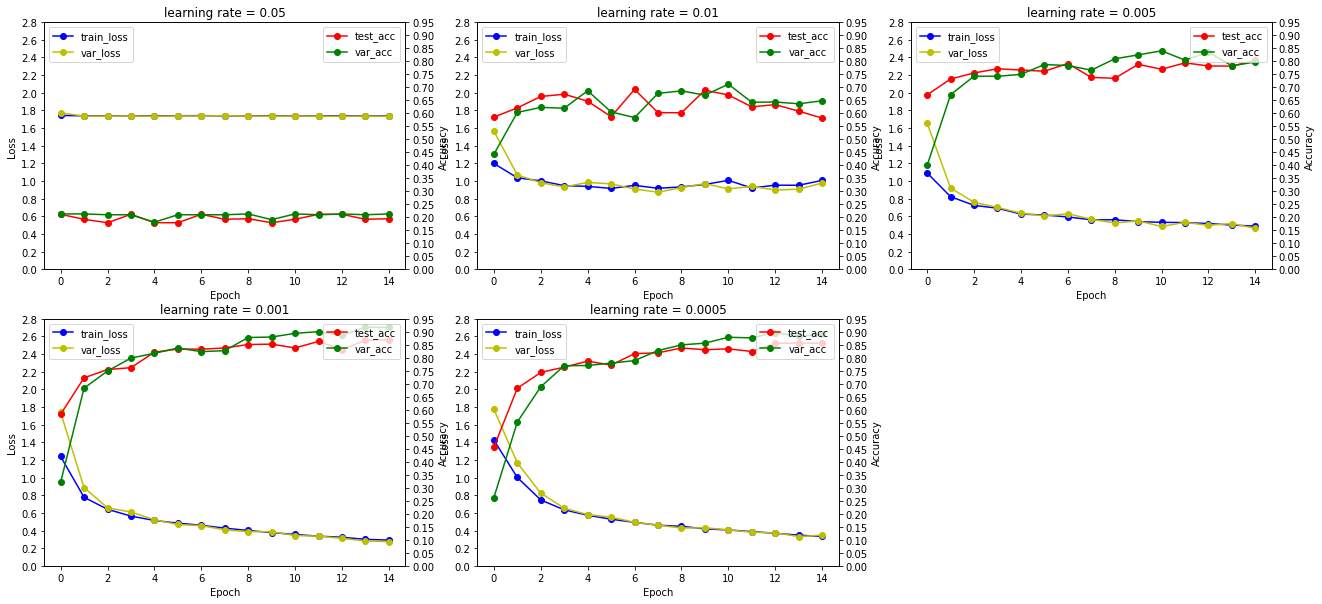

In [ ]:
print('The length of the train_loss is %d' %len(train_loss))
print('The length of the first item in train_loss is %d' %len(train_loss[0]))
plt.figure
plt.figure(figsize=(22,10))

plt.subplot(2,3,1)
plt.title('learning rate = 0.05')
plt.plot(np.arange(15),train_loss[0][0:15],color = 'b',marker = 'o')
plt.plot(np.arange(15),val_loss[0][0:15],color = 'y',marker = 'o')
plt.yticks(np.arange(0,3,0.2))
plt.legend(['train_loss','var_loss'],loc = 'upper left')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.twinx()
plt.plot(np.arange(15),test_acc[0][0:15],color = 'r',marker = 'o')
plt.plot(np.arange(15),val_acc[0][0:15],color = 'g',marker = 'o')
plt.yticks(np.arange(0,1,0.05))
plt.ylabel('Accuracy')
plt.legend(['test_acc','var_acc'],loc = 'upper right')

plt.subplot(2,3,2)
plt.title('learning rate = 0.01')
plt.plot(np.arange(15),train_loss[1][0:15],color = 'b',marker = 'o')
plt.plot(np.arange(15),val_loss[1][0:15],color = 'y',marker = 'o')
plt.yticks(np.arange(0,3,0.2))
plt.legend(['train_loss','var_loss'],loc = 'upper left')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.twinx()
plt.plot(np.arange(15),test_acc[1][0:15],color = 'r',marker = 'o')
plt.plot(np.arange(15),val_acc[1][0:15],color = 'g',marker = 'o')
plt.yticks(np.arange(0,1,0.05))
plt.ylabel('Accuracy')
plt.legend(['test_acc','var_acc'],loc = 'upper right')

plt.subplot(2,3,3)
plt.title('learning rate = 0.005')
plt.plot(np.arange(15),train_loss[2][0:15],color = 'b',marker = 'o')
plt.plot(np.arange(15),val_loss[2][0:15],color = 'y',marker = 'o')
plt.yticks(np.arange(0,3,0.2))
plt.legend(['train_loss','var_loss'],loc = 'upper left')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.twinx()
plt.plot(np.arange(15),test_acc[2][0:15],color = 'r',marker = 'o')
plt.plot(np.arange(15),val_acc[2][0:15],color = 'g',marker = 'o')
plt.yticks(np.arange(0,1,0.05))
plt.ylabel('Accuracy')
plt.legend(['test_acc','var_acc'],loc = 'upper right')

plt.subplot(2,3,4)
plt.title('learning rate = 0.001')
plt.plot(np.arange(15),train_loss[3][0:15],color = 'b',marker = 'o')
plt.plot(np.arange(15),val_loss[3][0:15],color = 'y',marker = 'o')
plt.yticks(np.arange(0,3,0.2))
plt.legend(['train_loss','var_loss'],loc = 'upper left')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.twinx()
plt.plot(np.arange(15),test_acc[3][0:15],color = 'r',marker = 'o')
plt.plot(np.arange(15),val_acc[3][0:15],color = 'g',marker = 'o')
plt.yticks(np.arange(0,1,0.05))
plt.ylabel('Accuracy')
plt.legend(['test_acc','var_acc'],loc = 'upper right')

plt.subplot(2,3,5)
plt.title('learning rate = 0.0005')
plt.plot(np.arange(15),train_loss[4][0:15],color = 'b',marker = 'o')
plt.plot(np.arange(15),val_loss[4][0:15],color = 'y',marker = 'o')
plt.yticks(np.arange(0,3,0.2))
plt.legend(['train_loss','var_loss'],loc = 'upper left')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.twinx()
plt.plot(np.arange(15),test_acc[4][0:15],color = 'r',marker = 'o')
plt.plot(np.arange(15),val_acc[4][0:15],color = 'g',marker = 'o')
plt.yticks(np.arange(0,1,0.05))
plt.ylabel('Accuracy')
plt.legend(['test_acc','var_acc'],loc = 'upper right')

### From the printed and visualized results above, we could find the best accuracy is around 90% when batch size = 6, learning rate = 0.001, epoch = 15

# 8. Visualization the results

In this part, we train the network again using the hyperparameters which could reach the best result.

However, in order to make the performance matrix (next part) more persuasive and reasonable, I increased the batch size from 6 to 32 for training Dataloader; and increase 6 to 16 for validation and testing dataloader.

## 1) Increase the batch size

In [25]:
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=16, shuffle=True)


# check some properties in the first batch
first_batch = next(iter(train_dataloader))

print(f'the type of this object is {type(first_batch)}') 
print(f'the length of this tuple is {len(first_batch)}')  
print(f'the type of the first item in the tuple is {type(first_batch[0])}')  # Tensor!
print(f'the shape of the first item (image tensors) is {first_batch[0].shape}')  # The size of image tensors in this batch!
print(f'the shape of the first item (image tensors) is {first_batch[0][0].shape}')

print(f'the shape of the second item is {first_batch[1].shape}')
print(f'the second item in the tuple is {first_batch[1]}')  # The labels (batch size=6 means there are 32 labels)

the type of this object is <class 'list'>
the length of this tuple is 2
the type of the first item in the tuple is <class 'torch.Tensor'>
the shape of the first item (image tensors) is torch.Size([32, 3, 224, 224])
the shape of the first item (image tensors) is torch.Size([3, 224, 224])
the shape of the second item is torch.Size([32])
the second item in the tuple is tensor([2, 1, 0, 2, 4, 1, 0, 4, 3, 1, 1, 1, 5, 1, 2, 3, 2, 0, 5, 0, 3, 3, 3, 1,
        1, 0, 1, 1, 1, 3, 2, 0])


## 2) Define and train the network again

In [35]:

# The code below using the pre-trained AlexNet network
# net = models.alexnet(pretrained=True).cuda()


class AlexNet(nn.Module):
    def __init__(self, num_classes=6, init_weights=False):   
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(  # pack up all the layers
            nn.Conv2d(3, 48, kernel_size=11, stride=4, padding=2),  # input[3, 224, 224]  output[48, 55, 55] (remove the value after decimal point auto)
            nn.ReLU(inplace=True), #inplace could load larger model
            nn.MaxPool2d(kernel_size=3, stride=2),                  # output[48, 27, 27] 
            nn.Conv2d(48, 128, kernel_size=5, padding=2),           # output[128, 27, 27]
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),                  # output[128, 13, 13]
            nn.Conv2d(128, 192, kernel_size=3, padding=1),          # output[192, 13, 13]
            nn.ReLU(inplace=True),
            nn.Conv2d(192, 192, kernel_size=3, padding=1),          # output[192, 13, 13]
            nn.ReLU(inplace=True),
            nn.Conv2d(192, 128, kernel_size=3, padding=1),          # output[128, 13, 13]
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),                  # output[128, 6, 6]
        )
        self.classifier = nn.Sequential(
            nn.Dropout(p=0.5),
            #fully connected layer
            nn.Linear(128 * 6 * 6, 2048),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5),
            nn.Linear(2048, 2048),
            nn.ReLU(inplace=True),
            nn.Linear(2048, num_classes),
        )
        if init_weights:
            self._initialize_weights()

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, start_dim=1) #flatten  or using view()
        x = self.classifier(x)
        return x

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)  #normalization 
                nn.init.constant_(m.bias, 0)

net = AlexNet(num_classes=6, init_weights=True).cuda()


In [36]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [37]:
def testset_precision(net, testset): # This function is used for calculate the accuracy for the testset
    dl = DataLoader(testset, batch_size = 128) # load test set
    total_count = 0  # total numbers of test set
    total_correct = 0 # total correct predictions of test set
    for data in dl:  # iterate test set
        inputs = data[0].cuda()  # input data, such as images, etc
        targets = data[1].cuda()   # ground truth labels
        outputs = net(inputs)    # get the outputs from network
        predicted_labels = outputs.argmax(dim=1)  # obtain the class with highest score as prediction
        comparison = predicted_labels == targets  # get a [True, False,...] matrix. True means correct prediction
        total_count += predicted_labels.size(0)   # accumulate the test number
        total_correct += comparison.sum()      # accumulate the number of correct predictions
        
    return int(total_correct) / int(total_count)

In [38]:
# In this part, we train the network using batch size = 32
my_train_loss = []
my_test_acc = []
my_val_loss = []
my_val_acc = []
for epoch in range(15):  # loop over the dataset multiple times
    val_running_loss = 0.0
    for i, data in enumerate(val_dataloader, 0):
        # get the inputs
        inputs, labels = data
        
        if torch.cuda.is_available(): # load into GPU
          inputs,labels = inputs.cuda(), labels.cuda()
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        if torch.cuda.is_available():
          loss = loss.cpu()

        # print statistics
        val_running_loss += loss.item()
        
    print('The val_loss of the %d epoch is: %.3f' %
                      (epoch + 1, val_running_loss / len(val_dataloader)))
    a = testset_precision(net, val_dataset)
    print(f'validation set accuracy is: {a}')
    my_val_loss.append(val_running_loss / len(val_dataloader))
    my_val_acc.append(a)
            
    train_running_loss = 0.0
    for i, data in enumerate(train_dataloader, 0):
        # get the inputs
        inputs, labels = data
        if torch.cuda.is_available():
          inputs,labels = inputs.cuda(), labels.cuda()
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        if torch.cuda.is_available():
          loss = loss.cpu()

        # print statistics
        train_running_loss += loss.item()
    print('The train_loss of the %d epoch is: %.3f' %
                    (epoch + 1, train_running_loss / len(train_dataloader)))
    b = testset_precision(net, test_dataset)
    print(f'test set accuracy is: {b}')
    my_train_loss.append(train_running_loss / len(train_dataloader))
    my_test_acc.append(b)
print('Finished Training')

The val_loss of the 1 epoch is: 1.732
validation set accuracy is: 0.25701149425287356
The train_loss of the 1 epoch is: 1.531
test set accuracy is: 0.40036764705882355
The val_loss of the 2 epoch is: 1.340
validation set accuracy is: 0.46482758620689657
The train_loss of the 2 epoch is: 1.191
test set accuracy is: 0.5569852941176471
The val_loss of the 3 epoch is: 1.056
validation set accuracy is: 0.5990804597701149
The train_loss of the 3 epoch is: 0.897
test set accuracy is: 0.6709558823529411
The val_loss of the 4 epoch is: 0.806
validation set accuracy is: 0.6924137931034483
The train_loss of the 4 epoch is: 0.735
test set accuracy is: 0.7371323529411765
The val_loss of the 5 epoch is: 0.707
validation set accuracy is: 0.7213793103448276
The train_loss of the 5 epoch is: 0.661
test set accuracy is: 0.7566176470588235
The val_loss of the 6 epoch is: 0.635
validation set accuracy is: 0.735632183908046
The train_loss of the 6 epoch is: 0.600
test set accuracy is: 0.7790441176470588
Th

In [66]:
# Check the prediction of the first batch

X_actual = next(iter(train_dataloader))
Y_predic = torch.argmax(net(X_actual[0].cuda()), dim=1)
print(X_actual[1])
print(Y_predic)

tensor([1, 3, 5, 2, 3, 0, 1, 4, 0, 1, 1, 3, 2, 0, 2, 0, 0, 3, 5, 1, 3, 3, 4, 1,
        3, 1, 2, 2, 0, 3, 5, 5])
tensor([0, 3, 5, 2, 3, 0, 1, 4, 1, 1, 1, 3, 2, 0, 2, 0, 0, 3, 5, 0, 3, 3, 4, 1,
        3, 1, 2, 2, 4, 3, 5, 5], device='cuda:0')


## 3) Visualize the first 8 images in a batch with their GroundTruth and Prediction labels

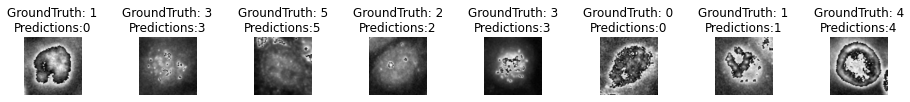

In [67]:

fig, ax = plt.subplots(nrows=1, ncols=8)   # Visualization
plt.subplots_adjust(left=8, right=10, wspace=1)
for idx in range(8):
    ax[idx].imshow(X_actual[0][idx].permute(1,2,0))
    ax[idx].axis('off')
    ax[idx].set_title(f'GroundTruth: {X_actual[1][idx]}\nPredictions:{Y_predic[idx]}')

# 9. Performance matrix

In [68]:
X_actual = X_actual[1].cpu().numpy()
print(X_actual)
Y_predic = Y_predic.data.cpu().numpy()
print(Y_predic)

[1 3 5 2 3 0 1 4 0 1 1 3 2 0 2 0 0 3 5 1 3 3 4 1 3 1 2 2 0 3 5 5]
[0 3 5 2 3 0 1 4 1 1 1 3 2 0 2 0 0 3 5 0 3 3 4 1 3 1 2 2 4 3 5 5]


In [69]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss

results = confusion_matrix(X_actual, Y_predic)
print ('Confusion Matrix :')
print(results)
print ('Accuracy Score is',accuracy_score(X_actual, Y_predic))
print ('Classification Report : ')
print (classification_report(X_actual, Y_predic))


Confusion Matrix :
[[4 1 0 0 1 0]
 [2 5 0 0 0 0]
 [0 0 5 0 0 0]
 [0 0 0 8 0 0]
 [0 0 0 0 2 0]
 [0 0 0 0 0 4]]
Accuracy Score is 0.875
Classification Report : 
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.83      0.71      0.77         7
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         8
           4       0.67      1.00      0.80         2
           5       1.00      1.00      1.00         4

    accuracy                           0.88        32
   macro avg       0.86      0.90      0.87        32
weighted avg       0.88      0.88      0.87        32



# 10. Save the network we trained

save it to your own google drive

In [42]:
# PATH1 = '/content/drive/MyDrive/ELEC5622project2.pth'
# torch.save(net.state_dict(), PATH1)
PATH1 = '/content/drive/MyDrive/ELEC5622project2net.pth'
torch.save(net, PATH1)

# References:

1. Image transforms:
https://www.cxyzjd.com/article/weixin_42237113/108846718

2. Performance matrix:
https://www.tutorialspoint.com/machine_learning_with_python/machine_learning_algorithms_performance_metrics.htm

3. AlexNet network define:
https://zhuanlan.zhihu.com/p/180554948
